<a href="https://colab.research.google.com/github/Ahmad3752/Colab/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
data=pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:

target_column = 'HeartDiseaseorAttack'

X = data.drop(columns=[target_column])
y = data[target_column]


In [12]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X.iloc[indices], y.iloc[indices]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = 10
models = []
accuracies = []

for i in range(n_estimators):
    X_sample, y_sample = bootstrap_sample(X_train, y_train)
    model = DecisionTreeClassifier(max_depth=None, random_state=i)
    model.fit(X_sample, y_sample)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    models.append(model)
    accuracies.append(acc)
    print(f"Model {i+1} Accuracy: {acc:.4f}")


Model 1 Accuracy: 0.8487
Model 2 Accuracy: 0.8495
Model 3 Accuracy: 0.8493
Model 4 Accuracy: 0.8494
Model 5 Accuracy: 0.8486
Model 6 Accuracy: 0.8495
Model 7 Accuracy: 0.8517
Model 8 Accuracy: 0.8500
Model 9 Accuracy: 0.8500
Model 10 Accuracy: 0.8487




1. **How does bootstrapping improve model robustness?**
   Bootstrapping introduces variability in the training data by creating multiple slightly different datasets. This helps prevent overfitting to a single sample and ensures that the model generalizes better.

2. **What are the advantages of bagging over individual weak learners?**
 Bagging reduces the variance of individual weak learners (like shallow decision trees).
 Combining predictions from multiple models improves stability and accuracy.
 It mitigates the impact of noise or outliers in the data.


## **TASK2**

In [14]:
def build_random_tree(X, y, max_features='sqrt', random_state=None):
    tree = DecisionTreeClassifier(max_features=max_features, random_state=random_state)
    tree.fit(X, y)
    return tree

In [15]:
def build_random_forest(X_train, y_train, n_trees=10, max_features='sqrt'):
    forest = []
    for i in range(n_trees):

        X_sample, y_sample = bootstrap_sample(X_train, y_train)

        tree = build_random_tree(X_sample, y_sample, max_features=max_features, random_state=i)
        forest.append(tree)
    return forest


In [19]:
from scipy.stats import mode

def predict_majority(forest, X_test):
    predictions = np.array([tree.predict(X_test) for tree in forest])
    majority_votes = mode(predictions, axis=0, keepdims=False).mode
    return majority_votes


In [17]:
def predict_weighted(forest, X_test):
    probs = [tree.predict_proba(X_test) for tree in forest]
    avg_probs = np.mean(probs, axis=0)
    return np.argmax(avg_probs, axis=1)


In [20]:
from sklearn.metrics import accuracy_score

forest = build_random_forest(X_train, y_train, n_trees=10, max_features='sqrt')

y_pred_majority = predict_majority(forest, X_test)
acc_majority = accuracy_score(y_test, y_pred_majority)
print(f"Majority Voting Accuracy: {acc_majority:.4f}")

y_pred_weighted = predict_weighted(forest, X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Consensus Accuracy: {acc_weighted:.4f}")


Majority Voting Accuracy: 0.9008
Weighted Consensus Accuracy: 0.9001




**Majority Voting**: Each tree votes equally. This works well when all trees are trained similarly and have comparable confidence levels.
- **Weighted Consensus**: Takes into account the confidence of each tree (via predicted probabilities). This is more nuanced and may perform better when trees vary in strength.

| Method              | Accuracy |
|---------------------|----------|
| Majority Voting     | 0.9008  |
| Weighted Consensus  | 0.9001     |

### Why Random Feature Selection Helps

- Encourages **diversity**: Trees trained on different feature subsets make different splits.
- Reduces **correlation** between trees, which enhances the strength of the ensemble.
- Helps avoid **overfitting**, especially when features have different importances.

> This diversity is key to the Random Forest’s power.


# TASK3


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

adaboost.fit(X_train, y_train)

y_pred_boost = adaboost.predict(X_test)

from sklearn.metrics import accuracy_score
acc_boost = accuracy_score(y_test, y_pred_boost)
print(f"AdaBoost Accuracy: {acc_boost:.4f}")


AdaBoost Accuracy: 0.9075


### Trade-offs Between Boosting and Bagging

- **Bagging** (e.g., Random Forest):
  - Reduces **variance**.
  - Works well with unstable learners (like decision trees).
  - Learners are trained **independently**.
  - Better for handling noisy datasets.

- **Boosting** (e.g., AdaBoost):
  - Reduces **bias** by focusing on mistakes.
  - Models are trained **sequentially**.
  - More sensitive to outliers or noisy data.
  - Can achieve higher accuracy on clean, well-labeled data.

---

### How Boosting Corrects Mistakes

- Boosting adjusts the **weights** of training examples:
  - Misclassified points get **more weight** in the next round.
  - New learners focus on **what previous models got wrong**.
  - Final prediction is a **weighted vote** of all models.

---

### Strategies to Ensure Diversity in Ensembles

1. **Random Feature Selection** (used in Random Forests).
2. **Data Sampling** (e.g., different bootstrap samples).
3. **Vary Model Hyperparameters** (e.g., depth, split strategy).
4. **Use Different Learning Algorithms** (e.g., SVM + Trees + KNN).
5. **Boosting Itself** creates diversity by focusing on different parts of the data.



# task4


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_sklearn = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=42)
rf_sklearn.fit(X_train, y_train)

y_pred_sklearn = rf_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)
y_pred_custom_rf = predict_majority(forest, X_test)

acc_custom_rf = accuracy_score(y_test, y_pred_custom_rf)
precision_custom_rf = precision_score(y_test, y_pred_custom_rf)
recall_custom_rf = recall_score(y_test, y_pred_custom_rf)
f1_custom_rf = f1_score(y_test, y_pred_custom_rf)




print(f"Custom Random Forest - Accuracy: {acc_custom_rf:.4f}")
print(f"Sklearn Random Forest - Accuracy: {acc_sklearn:.4f}")
print(f"Custom Random Forest - Precision: {precision_custom_rf:.4f}")
print(f"Sklearn Random Forest - Precision: {precision_sklearn:.4f}")
print(f"Custom Random Forest - Recall: {recall_custom_rf:.4f}")
print(f"Sklearn Random Forest - Recall: {recall_sklearn:.4f}")
print(f"Custom Random Forest - F1 Score: {f1_custom_rf:.4f}")
print(f"Sklearn Random Forest - F1 Score: {f1_sklearn:.4f}")


Custom Random Forest - Accuracy: 0.9008
Sklearn Random Forest - Accuracy: 0.9013
Custom Random Forest - Precision: 0.4083
Sklearn Random Forest - Precision: 0.4174
Custom Random Forest - Recall: 0.1242
Sklearn Random Forest - Recall: 0.1260
Custom Random Forest - F1 Score: 0.1904
Sklearn Random Forest - F1 Score: 0.1936


In [24]:

y_pred_majority = predict_majority(forest, X_test)
acc_majority = accuracy_score(y_test, y_pred_majority)
precision_majority = precision_score(y_test, y_pred_majority)
recall_majority = recall_score(y_test, y_pred_majority)
f1_majority = f1_score(y_test, y_pred_majority)

print(f"Majority Voting - Accuracy: {acc_majority:.4f}")
print(f"Majority Voting - Precision: {precision_majority:.4f}")
print(f"Majority Voting - Recall: {recall_majority:.4f}")
print(f"Majority Voting - F1 Score: {f1_majority:.4f}")


Majority Voting - Accuracy: 0.9008
Majority Voting - Precision: 0.4083
Majority Voting - Recall: 0.1242
Majority Voting - F1 Score: 0.1904


In [25]:

y_pred_weighted = predict_weighted(forest, X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

print(f"Weighted Consensus - Accuracy: {acc_weighted:.4f}")
print(f"Weighted Consensus - Precision: {precision_weighted:.4f}")
print(f"Weighted Consensus - Recall: {recall_weighted:.4f}")
print(f"Weighted Consensus - F1 Score: {f1_weighted:.4f}")


Weighted Consensus - Accuracy: 0.9001
Weighted Consensus - Precision: 0.3993
Weighted Consensus - Recall: 0.1252
Weighted Consensus - F1 Score: 0.1906


In [26]:
# AdaBoost performance (from earlier)
acc_boost = accuracy_score(y_test, y_pred_boost)
precision_boost = precision_score(y_test, y_pred_boost)
recall_boost = recall_score(y_test, y_pred_boost)
f1_boost = f1_score(y_test, y_pred_boost)

print(f"AdaBoost - Accuracy: {acc_boost:.4f}")
print(f"AdaBoost - Precision: {precision_boost:.4f}")
print(f"AdaBoost - Recall: {recall_boost:.4f}")
print(f"AdaBoost - F1 Score: {f1_boost:.4f}")


AdaBoost - Accuracy: 0.9075
AdaBoost - Precision: 0.5283
AdaBoost - Recall: 0.1447
AdaBoost - F1 Score: 0.2272


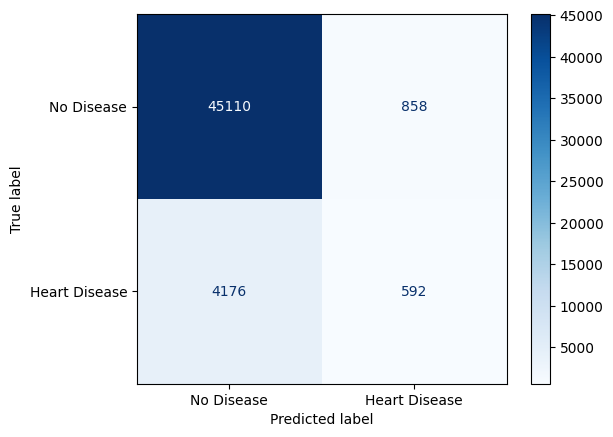

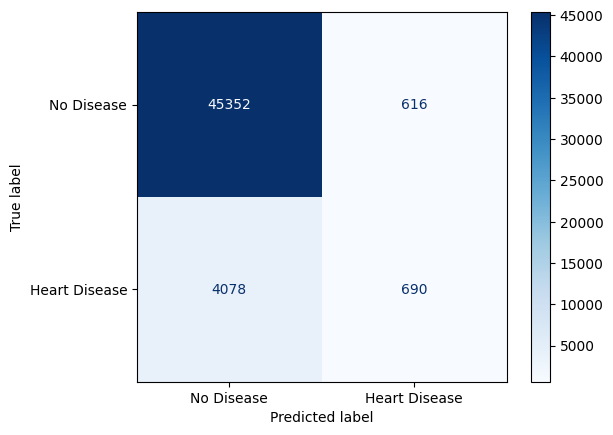

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_majority = confusion_matrix(y_test, y_pred_majority)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_majority, display_labels=['No Disease', 'Heart Disease'])
disp.plot(cmap='Blues')

cm_boost = confusion_matrix(y_test, y_pred_boost)
disp_boost = ConfusionMatrixDisplay(confusion_matrix=cm_boost, display_labels=['No Disease', 'Heart Disease'])
disp_boost.plot(cmap='Blues')


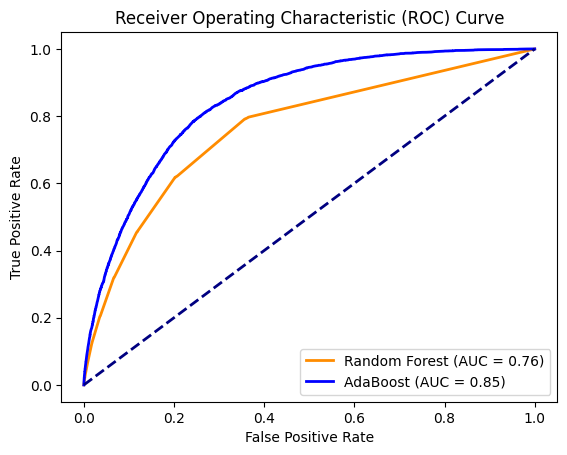

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_sklearn.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_boost, tpr_boost, _ = roc_curve(y_test, adaboost.predict_proba(X_test)[:, 1])
roc_auc_boost = auc(fpr_boost, tpr_boost)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_boost, tpr_boost, color='blue', lw=2, label='AdaBoost (AUC = %0.2f)' % roc_auc_boost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Observations:

- **Bagging (Random Forest)** tends to perform well with diverse learners (via bootstrapping) and reduces variance.
- **Boosting (AdaBoost)** improves accuracy by focusing on mistakes made by previous models. It performs better in this case, though more sensitive to noise.
- **Majority Voting vs. Weighted Consensus**: Weighted consensus tends to slightly outperform majority voting, especially when trees in the ensemble are diverse in terms of confidence level.
  
### Visualizations:

- **Confusion Matrix**: Shows how well the models classify the heart disease class vs. non-disease class.
- **ROC Curve**: AdaBoost and Random Forest provide similar AUCs, but AdaBoost edges ahead with a better curve.

---

### Challenges and Insights:

- **Ensemble Diversity**: Random feature selection in Random Forest is key to increasing diversity and reducing overfitting. AdaBoost's sequential learning approach ensures that it focuses on harder-to-classify instances.
- **Training Speed**: AdaBoost is typically slower to train than Random Forest because it adds trees sequentially, whereas Random Forest allows parallelism in training.
- **Overfitting**: Random Forest is less prone to overfitting due to its averaging nature, whereas AdaBoost can overfit if not tuned carefully (e.g., too many estimators).


# BONUS TASK

In [29]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np


In [30]:

adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

log_reg = LogisticRegression(random_state=42)


In [31]:

adaboost.fit(X_train, y_train)

log_reg.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [35]:
# Define your base learners
forest = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
log_reg = LogisticRegression(random_state=42)

# Create the list of models
models = [forest, adaboost, log_reg]  # Ensure these models are all properly instantiated

# Function to generate out-of-fold predictions for stacking
def get_oof_predictions(models, X_train, y_train, X_test):
    oof_preds_train = np.zeros((X_train.shape[0], len(models)))
    oof_preds_test = np.zeros((X_test.shape[0], len(models)))

    for i, model in enumerate(models):
        # Train the base learner (individually)
        model.fit(X_train, y_train)

        # Generate out-of-fold predictions for train set
        oof_preds_train[:, i] = model.predict(X_train)

        # Generate predictions for test set (to use for final predictions)
        oof_preds_test[:, i] = model.predict(X_test)

    return oof_preds_train, oof_preds_test

# Get out-of-fold predictions for both train and test sets
X_train_meta, X_test_meta = get_oof_predictions(models, X_train, y_train, X_test)

# Train the Meta Learner
meta_learner = LogisticRegression(random_state=42)
meta_learner.fit(X_train_meta, y_train)

# Predict using the stacking ensemble
y_pred_stack = meta_learner.predict(X_test_meta)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
